Imports

In [1]:
%load_ext autoreload
%autoreload 2

import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.models import resnet34

from MLProject2Dataset import MLProject2Dataset
from CNNModels import SimpleCNN, ComplexCNN, ComplexCNNMeta
from helper_functions import display_conf_matrix, plot_training_progress, train_net, test_net, print_elapsed_time
from timeit import default_timer as timer

Επιλογή συσκευής

In [2]:
start_time = timer()

device = ("cuda" if torch.cuda.is_available()
          else "mps" if torch.backends.mps.is_available()
          else "cpu")

# device= 'cpu'

Ορισμός κλάσεων προβλέψεων

In [3]:
class_labels = {
    0: 'MEL',
    1: 'NV',
    2: 'BCC',
    3: 'AKIEC',
    4: 'BKL',
    5: 'DF',
    6: 'VASC'
}

# 4. Απλό ΣΝΔ

## 4.1 Δημιουργία υποσυνόλου εκπαίδευσης, δοκιμής

In [4]:
image_transforms = transforms.Compose([
            transforms.Resize((50, 62), antialias=True),
            transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
        ])

dataset = MLProject2Dataset('./data/dermoscopy_classification', transform=image_transforms)

generator = torch.Generator().manual_seed(42)
train_simple, validate_simple, test_simple = torch.utils.data.random_split(dataset, [0.6, 0.1, 0.3], generator)

In [5]:
BATCH_SIZE = 128
train_dataloader_simple = DataLoader(train_simple, batch_size=BATCH_SIZE, shuffle=True)
validate_dataloader_simple = DataLoader(validate_simple, batch_size=BATCH_SIZE, shuffle=False)
test_dataloader_simple = DataLoader(test_simple, batch_size=BATCH_SIZE, shuffle=False)

In [6]:
model = SimpleCNN().to(device)
loss_fn = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1)

## 4.2 Εκπαίδευση

In [7]:
epochs_simple, t_loss_simple, t_acc_simple, v_loss_simple, v_acc_simple = train_net(model, train_dataloader_simple, validate_dataloader_simple, optimizer = optimizer, loss=loss_fn, device=device, print_period=10, epochs=20)

Training on cuda


Epochs completed:   0%|          | 0/20 [00:00<?, ?it/s]

[Epoch: 1, batch: 10] Train loss: 1.374, Train acc: 0.627 | Validation loss: 1.101, Validation acc: 0.687
[Epoch: 1, batch: 20] Train loss: 1.137, Train acc: 0.663 | Validation loss: 0.999, Validation acc: 0.687
[Epoch: 1, batch: 30] Train loss: 1.126, Train acc: 0.654 | Validation loss: 0.974, Validation acc: 0.687
[Epoch: 1, batch: 40] Train loss: 1.002, Train acc: 0.676 | Validation loss: 0.969, Validation acc: 0.687
---Epoch 1 report | Train loss 1.144, Train accuracy 0.656 | Validation loss 0.930, Validation accuracy: 0.687
[Epoch: 2, batch: 3] Train loss: 1.026, Train acc: 0.666 | Validation loss: 0.964, Validation acc: 0.685
[Epoch: 2, batch: 13] Train loss: 0.986, Train acc: 0.667 | Validation loss: 0.955, Validation acc: 0.687
[Epoch: 2, batch: 23] Train loss: 0.985, Train acc: 0.670 | Validation loss: 0.894, Validation acc: 0.684
[Epoch: 2, batch: 33] Train loss: 1.017, Train acc: 0.645 | Validation loss: 0.898, Validation acc: 0.685
[Epoch: 2, batch: 43] Train loss: 0.947, T

## 4.3 Γράφημα απώλειας και ευστοχίας

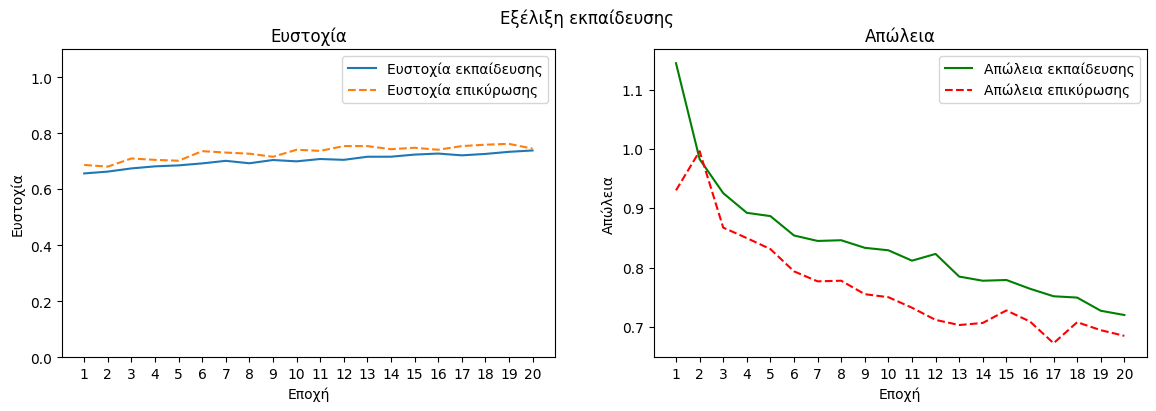

In [18]:
plot_training_progress(epochs_simple, t_acc_simple, v_acc_simple, t_loss_simple, v_loss_simple)

## 4.4 Αξιολόγηση μοντέλου στο σύνολο δοκιμής

In [9]:
y_preds_simple = test_net(model, test_dataloader_simple, loss_fn, device)

Average loss: 0.0060. Test accuracy in 2987 images: 0.7121


## 4.5 Υπολογισμός πίνακα σύγχησης

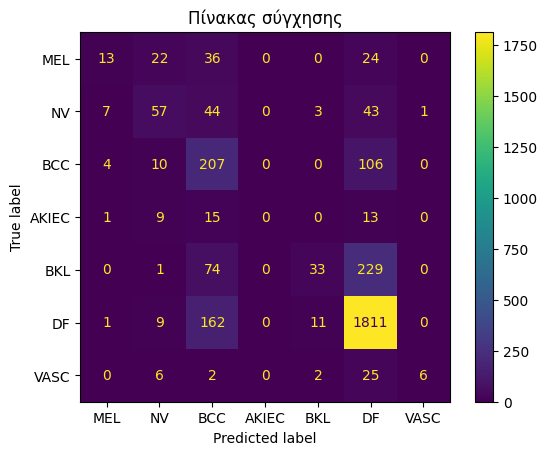

In [10]:
display_conf_matrix(y_preds_simple, test_simple, class_labels)

# 5. Σύνθετο ΣΝΔ

## 5.1 Δημιουργία υποσυνόλου εκπαίδευσης, δοκιμής

In [19]:
image_transforms = transforms.Compose([
            transforms.Resize((100, 125), antialias=True),
            transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
        ])

dataset = MLProject2Dataset('./data/dermoscopy_classification', transform=image_transforms)

generator = torch.Generator().manual_seed(42)
train_complex, validate_complex, test_complex = torch.utils.data.random_split(dataset, [0.6, 0.1, 0.3], generator)

In [20]:
BATCH_SIZE = 128
train_dataloader_complex = DataLoader(train_complex, batch_size=BATCH_SIZE, shuffle=True)
validate_dataloader_complex = DataLoader(validate_complex, batch_size=BATCH_SIZE, shuffle=False)
test_dataloader_complex = DataLoader(test_complex, batch_size=BATCH_SIZE, shuffle=False)

In [21]:
model = ComplexCNN().to(device)
loss_fn = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

## 5.2 Εκπαίδευση

In [22]:
epochs_complex, t_loss_complex, t_acc_complex, v_loss_complex, v_acc_complex = train_net(model, train_dataloader_complex, validate_dataloader_complex, optimizer = optimizer, loss=loss_fn, device=device, print_period=10, epochs=20)

Training on cuda


Epochs completed:   0%|          | 0/20 [00:00<?, ?it/s]

[Epoch: 1, batch: 10] Train loss: 1.652, Train acc: 0.549 | Validation loss: 2.445, Validation acc: 0.055
[Epoch: 1, batch: 20] Train loss: 0.963, Train acc: 0.661 | Validation loss: 1.140, Validation acc: 0.664
[Epoch: 1, batch: 30] Train loss: 0.831, Train acc: 0.698 | Validation loss: 0.940, Validation acc: 0.700
[Epoch: 1, batch: 40] Train loss: 0.731, Train acc: 0.734 | Validation loss: 0.865, Validation acc: 0.720
---Epoch 1 report | Train loss 1.001, Train accuracy 0.671 | Validation loss 0.780, Validation accuracy: 0.730
[Epoch: 2, batch: 3] Train loss: 0.720, Train acc: 0.743 | Validation loss: 0.747, Validation acc: 0.728
[Epoch: 2, batch: 13] Train loss: 0.712, Train acc: 0.730 | Validation loss: 0.676, Validation acc: 0.759
[Epoch: 2, batch: 23] Train loss: 0.677, Train acc: 0.756 | Validation loss: 0.674, Validation acc: 0.762
[Epoch: 2, batch: 33] Train loss: 0.717, Train acc: 0.748 | Validation loss: 0.656, Validation acc: 0.770
[Epoch: 2, batch: 43] Train loss: 0.707, T

## 5.3 Γράφημα απώλειας και ευστοχίας

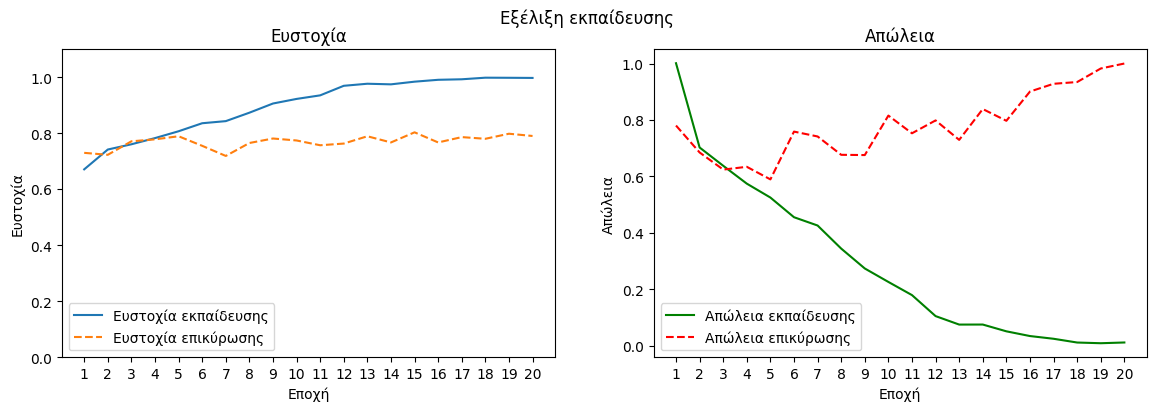

In [23]:
plot_training_progress(epochs_complex, t_acc_complex, v_acc_complex, t_loss_complex, v_loss_complex)

## 5.4 Αξιολόγηση μοντέλου στο σύνολο δοκιμής

In [24]:
y_preds_complex = test_net(model, test_dataloader_complex, loss_fn, device)

Average loss: 0.0094. Test accuracy in 2987 images: 0.7573


## 5.5 Υπολογισμός πίνακα σύγχησης

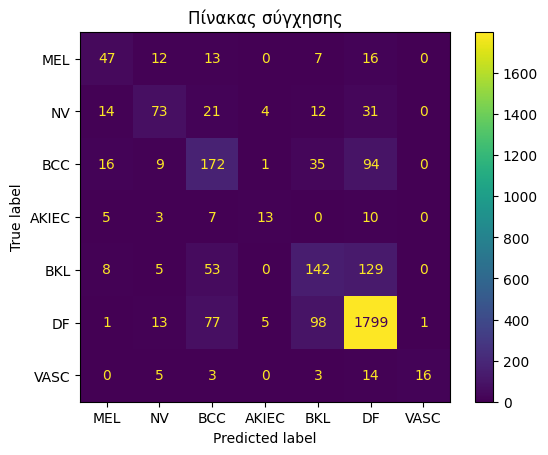

In [25]:
display_conf_matrix(y_preds_complex, test_complex, class_labels)

# 6. Μεταφορά μάθησης

## 6.1 Δημιουργία υποσυνόλου εκπαίδευσης, δοκιμής

In [26]:
data_transforms = {
        'train' : transforms.Compose([
            transforms.RandomResizedCrop(224, antialias=True),
            transforms.RandomHorizontalFlip(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
        'val' : transforms.Compose([
            transforms.Resize(256, antialias=True),
            transforms.CenterCrop(224),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])
    }

dataset_train_transfer = MLProject2Dataset('./data/dermoscopy_classification', transform=data_transforms['train'])
dataset_val_transfer = MLProject2Dataset('./data/dermoscopy_classification', transform=data_transforms['val'])

generator = torch.Generator().manual_seed(42)
train_transfer, _, _ = torch.utils.data.random_split(dataset_train_transfer, [0.6, 0.1, 0.3], generator)
generator = torch.Generator().manual_seed(42)
_, validate_transfer, test_transfer = torch.utils.data.random_split(dataset_val_transfer, [0.6, 0.1, 0.3], generator)

BATCH_SIZE = 128
train_dataloader_transfer = DataLoader(train_transfer, batch_size=BATCH_SIZE, shuffle=True)
validate_dataloader_transfer = DataLoader(validate_transfer, batch_size=BATCH_SIZE, shuffle=False)
test_dataloader_transfer = DataLoader(test_transfer, batch_size=BATCH_SIZE, shuffle=False)

In [27]:
model = resnet34(weights='DEFAULT').to(device)
loss_fn = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

## 6.2 Εκπαίδευση

In [28]:
epochs_transfer, t_loss_transfer, t_acc_transfer, v_loss_transfer, v_acc_transfer = train_net(model, train_dataloader_transfer, validate_dataloader_transfer, optimizer = optimizer, loss=loss_fn, device=device, print_period=10, epochs=5)

Training on cuda


Epochs completed:   0%|          | 0/5 [00:00<?, ?it/s]

[Epoch: 1, batch: 10] Train loss: 6.358, Train acc: 0.187 | Validation loss: 3.561, Validation acc: 0.682
[Epoch: 1, batch: 20] Train loss: 2.372, Train acc: 0.656 | Validation loss: 3.453, Validation acc: 0.698
[Epoch: 1, batch: 30] Train loss: 1.232, Train acc: 0.664 | Validation loss: 1.374, Validation acc: 0.707
[Epoch: 1, batch: 40] Train loss: 1.044, Train acc: 0.711 | Validation loss: 0.943, Validation acc: 0.727
---Epoch 1 report | Train loss 2.484, Train accuracy 0.577 | Validation loss 0.890, Validation accuracy: 0.748
[Epoch: 2, batch: 3] Train loss: 0.933, Train acc: 0.719 | Validation loss: 0.864, Validation acc: 0.750
[Epoch: 2, batch: 13] Train loss: 0.860, Train acc: 0.732 | Validation loss: 0.778, Validation acc: 0.750
[Epoch: 2, batch: 23] Train loss: 0.818, Train acc: 0.730 | Validation loss: 0.719, Validation acc: 0.769
[Epoch: 2, batch: 33] Train loss: 0.810, Train acc: 0.736 | Validation loss: 0.702, Validation acc: 0.766
[Epoch: 2, batch: 43] Train loss: 0.811, T

## 6.3 Γράφημα απώλειας και ευστοχίας

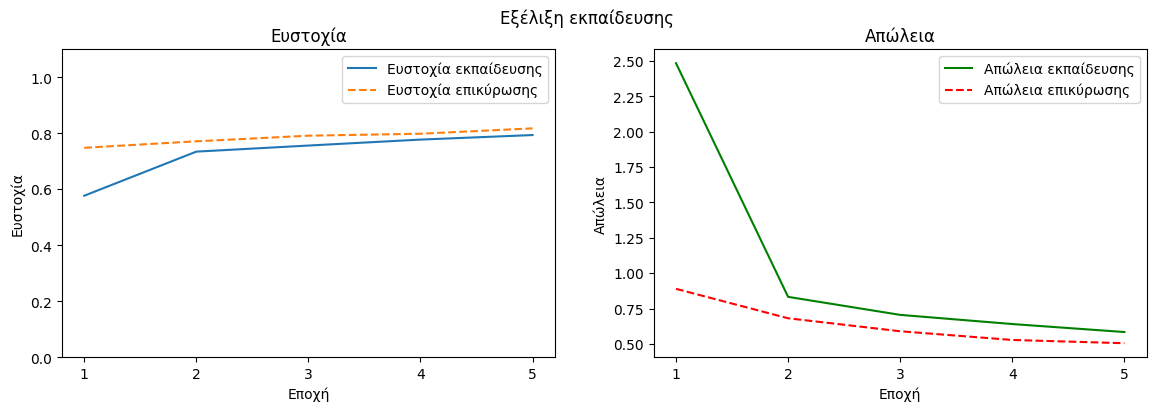

In [29]:
plot_training_progress(epochs_transfer, t_acc_transfer, v_acc_transfer, t_loss_transfer, v_loss_transfer)

## 6.4 Αξιολόγηση μοντέλου στο σύνολο δοκιμής

In [30]:
y_preds_transfer = test_net(model, test_dataloader_transfer, loss_fn, device)

Average loss: 0.0046. Test accuracy in 2987 images: 0.7998


## 6.5 Υπολογισμός πίνακα σύγχησης

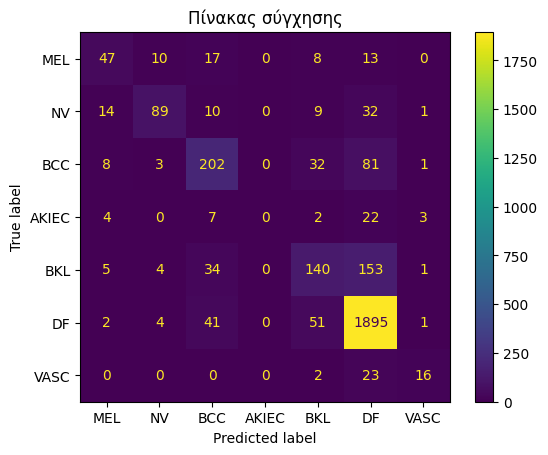

In [31]:
display_conf_matrix(y_preds_transfer, test_transfer, class_labels)

# Bonus 7. Αξιοποίηση δημογραφικών μεταβλητών

## 7.1 Δημιουργία υποσυνόλου εκπαίδευσης, δοκιμής

In [32]:
image_transforms = transforms.Compose([
            transforms.Resize((100, 125), antialias=True),
            transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
        ])

dataset = MLProject2Dataset('./data/dermoscopy_classification', transform=image_transforms, meta=True)

generator = torch.Generator().manual_seed(42)
train_meta, validate_meta, test_meta = torch.utils.data.random_split(dataset, [0.6, 0.1, 0.3], generator)

In [33]:
BATCH_SIZE = 256
train_dataloader_meta = DataLoader(train_meta, batch_size=BATCH_SIZE, shuffle=True)
validate_dataloader_meta = DataLoader(validate_meta, batch_size=BATCH_SIZE, shuffle=False)
test_dataloader_meta = DataLoader(test_meta, batch_size=BATCH_SIZE, shuffle=False)

In [34]:
model = ComplexCNNMeta().to(device)
loss_fn = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.001)

## 7.2 Εκπαίδευση

In [35]:
epochs_meta, t_loss_meta, t_acc_meta, v_loss_meta, v_acc_meta = train_net(model, train_dataloader_meta, validate_dataloader_meta, optimizer = optimizer, loss=loss_fn, device=device, print_period=10, epochs=20)

Training on cuda


Epochs completed:   0%|          | 0/20 [00:00<?, ?it/s]

/home/mike/HUA/ML/Deliverables/Excersise2/MLProject2Dataset.py:66: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (image, torch.tensor(self.dataset.loc[idx, 'age':], dtype=torch.float), self.dataset.at[idx, 'dx'].astype('long'))


[Epoch: 1, batch: 10] Train loss: 1.826, Train acc: 0.370 | Validation loss: 2.015, Validation acc: 0.071
[Epoch: 1, batch: 20] Train loss: 1.174, Train acc: 0.633 | Validation loss: 1.928, Validation acc: 0.062
---Epoch 1 report | Train loss 1.426, Train accuracy 0.522 | Validation loss 1.816, Validation accuracy: 0.346
[Epoch: 2, batch: 6] Train loss: 1.008, Train acc: 0.669 | Validation loss: 1.573, Validation acc: 0.663
[Epoch: 2, batch: 16] Train loss: 0.937, Train acc: 0.698 | Validation loss: 1.164, Validation acc: 0.705
---Epoch 2 report | Train loss 0.934, Train accuracy 0.692 | Validation loss 0.979, Validation accuracy: 0.709
[Epoch: 3, batch: 2] Train loss: 0.879, Train acc: 0.698 | Validation loss: 0.950, Validation acc: 0.715
[Epoch: 3, batch: 12] Train loss: 0.855, Train acc: 0.705 | Validation loss: 0.848, Validation acc: 0.728
[Epoch: 3, batch: 22] Train loss: 0.831, Train acc: 0.714 | Validation loss: 0.796, Validation acc: 0.740
---Epoch 3 report | Train loss 0.841, 

## 7.3 Γράφημα απώλειας και ευστοχίας

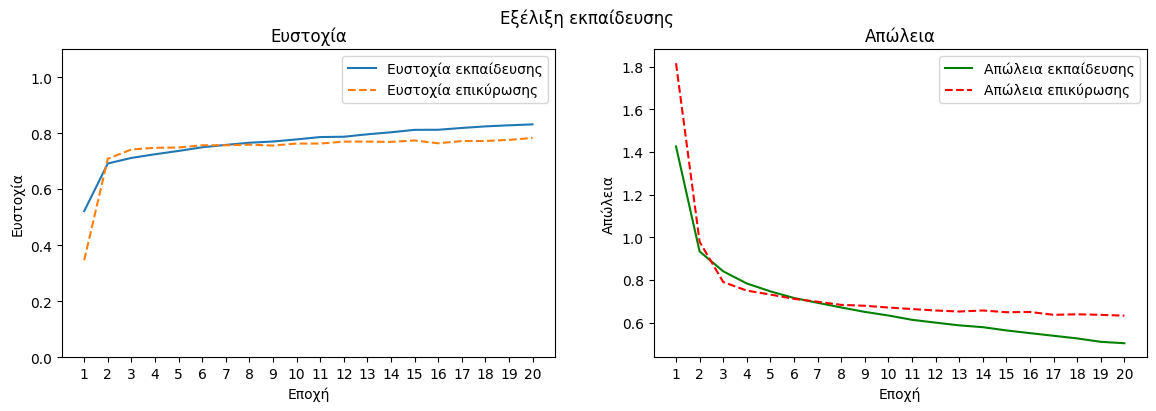

In [36]:
plot_training_progress(epochs_meta, t_acc_meta, v_acc_meta, t_loss_meta, v_loss_meta)

## 7.4 Αξιολόγηση μοντέλου στο σύνολο δοκιμής

In [37]:
y_preds_meta = test_net(model, test_dataloader_meta, loss_fn, device)

Average loss: 0.0029. Test accuracy in 2987 images: 0.7312


## 7.5 Υπολογισμός πίνακα σύγχησης

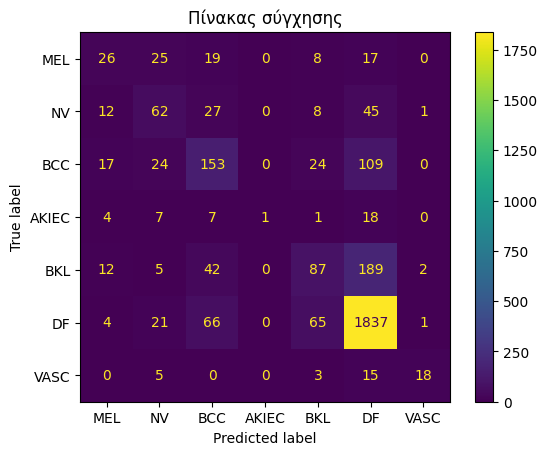

Train time on cuda: 4099.776 seconds


In [38]:
display_conf_matrix(y_preds_meta, test_meta, class_labels)

# Print total time since start_time
print_elapsed_time(start=start_time, end=timer(), device=device)

# For debugging - save results to file

In [40]:
binary_data = [epochs_simple, t_acc_simple, t_loss_simple, v_acc_simple, v_loss_simple,
                   epochs_complex, t_acc_complex, t_loss_complex, v_acc_complex, v_loss_complex,
                   epochs_transfer, t_acc_transfer, t_loss_transfer, v_acc_transfer, v_loss_transfer,
                   epochs_meta, t_acc_meta, t_loss_meta, v_acc_meta, v_loss_meta]
        

In [41]:
file_path = "./vars"

In [42]:
import pickle  # import pickle

fptr = open(file_path, "wb")  # open file in write binary mode
pickle.dump(binary_data, fptr)  # dump list data into file 
fptr.close()  # close file pointer



In [ ]:
fptr = open(file_path, "rb")  # open file in read binary mode
test_list = pickle.load(fptr)  # read binary data from file and store in list
# print(test_list)  # print the data
fptr.close()